# Real Estate Price Prediction

## Exploratory Data Analysis

The Background Introduction  
What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Feature Engineering
3. Data Cleaning
4. Encoding, Scaling and Preprocessing
5. Traning Machine Learning Models
5. Cross Validation and Ensembling Predictions

Prediction Used Model:
  *   1. Multivariate Linear Regression

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
4 continuous features: Bedroom, Totoal_Sqft, Bathroom
4 possible drop feature: Area Type, Society, Balcony, Availablility
1 target variable: Price

In [1]:
# import from google colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
!pip install -r requirements.txt

Mounted at /content/drive
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.1/670.1 kB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.9/326.9 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/1

In [2]:
#Code to verify the package installation
try:
  import tqdm
  print('package is installed.')
except:
  print('Package not found')

package is installed.


In [3]:
# Configuration Setting
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [4]:
# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import execdata as exe
from tabulate import tabulate
import pickle
import time
from rich.progress import track

import re
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # for showing percentage in it
import seaborn as sns
import itertools
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)
sns.set(style='darkgrid', font_scale=1.4)

#Imbalanced Dataset Learning
from imblearn.combine import SMOTEENN

#Scikit-Learn Fundamental Packages
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

In [5]:
# for i in track(range(15), description="[green]Loading..."):
#   time.sleep(1)

In [6]:
root_dir = '/content/drive/MyDrive'
work_dir = '/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project'
folder_dir = 'S6PO3OP-Real Estate Price Prediction'
data_dir =f'{work_dir}/{folder_dir}/data'
result_dir = f'{work_dir}/{folder_dir}/result'

In [7]:
import os
if not os.path.exists(data_dir):
  os.mkdir(data_dir)

In [8]:
import os
if not os.path.exists(result_dir):
  os.mkdir(result_dir)

In [9]:
%cd '{data_path}'
!pwd

[Errno 2] No such file or directory: '{data_path}'
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground


In [10]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')
# Read the dataset - switch to second link if first one not work, OP mean On Progressing
dataset_url_1 = 'Bengaluru_House_Data.csv'
dataset_url_2 = 'Bengaluru_House_Data.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_url_1), encoding = 'utf-8')
df2 = pd.read_csv(os.path.join(data_dir,dataset_url_2), encoding = 'utf-8')
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [11]:
new_column_names = {'area_type': 'Area Type', 'availability': 'Availability', 'location': 'Location', 'size': 'Bedroom', 'society': 'Society', 'total_sqft': 'Total_Sqft', 'bath': 'Bathroom', 'balcony': 'Balcony', 'price': 'Price'}
df = df.rename(columns=new_column_names, level=0)

In [12]:
df

,Area Type,Availability,Location,Bedroom,Society,Total_Sqft,Bathroom,Balcony,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [13]:
target_feature = 'Price'

In [14]:
print(f'the dataset_1 size is {df.shape} and target feature is {target_feature}')

the dataset_1 size is (13320, 9) and target feature is Price


In [15]:
# Check column name and categories
df.columns.values

array(['Area Type', 'Availability', 'Location', 'Bedroom', 'Society',
       'Total_Sqft', 'Bathroom', 'Balcony', 'Price'], dtype=object)

In [16]:
df.nunique()

Area Type          4
Availability      81
Location        1305
Bedroom           31
Society         2688
Total_Sqft      2117
Bathroom          19
Balcony            4
Price           1994
dtype: int64

In [17]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Type     13320 non-null  object 
 1   Availability  13320 non-null  object 
 2   Location      13319 non-null  object 
 3   Bedroom       13304 non-null  object 
 4   Society       7818 non-null   object 
 5   Total_Sqft    13320 non-null  object 
 6   Bathroom      13247 non-null  float64
 7   Balcony       12711 non-null  float64
 8   Price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Area Type          0
Availability       0
Location           1
Bedroom           16
Society         5502
Total_Sqft         0
Bathroom          73
Balcony          609
Price              0
dtype: int64

In [18]:
# Varify the data type match with corresponding columns types
df.dtypes

Area Type        object
Availability     object
Location         object
Bedroom          object
Society          object
Total_Sqft       object
Bathroom        float64
Balcony         float64
Price           float64
dtype: object

In [19]:
df.describe()

,Bathroom,Balcony,Price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


Your selected dataframe has 9 columns.
There are 5 columns that have missing values.


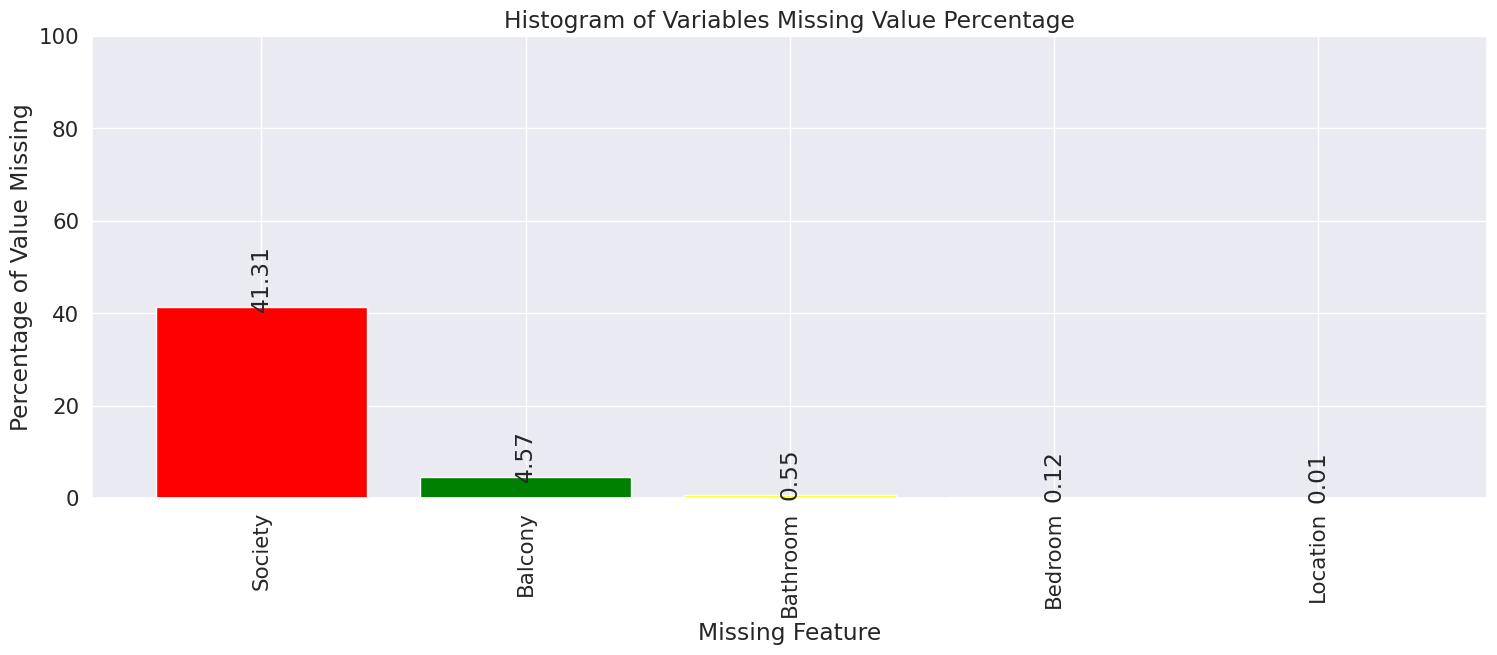

      index  Miss_Values  Miss_Rate  Available_Value
2   Society         5502      41.31             7818
4   Balcony          609       4.57            12711
3  Bathroom           73       0.55            13247
1   Bedroom           16       0.12            13304
0  Location            1       0.01            13319


['Society']

In [20]:
exe.graph.missing_value_analysis(df)

In [21]:
# list of numerical variables
numerical_features = exe.eda.numerical_features_list(df)

Number of Numerical Variables: 3
   Bathroom  Balcony   Price
0       2.0      1.0   39.07
1       5.0      3.0  120.00
2       2.0      3.0   62.00
3       3.0      1.0   95.00
4       2.0      1.0   51.00


In [22]:
# list of categorical_features
categorical_features = exe.eda.categorical_features_list(df)

Number of Categorical Variables: 6
              Area Type   Availability                  Location    Bedroom  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   Society Total_Sqft  
0  Coomee        1056  
1  Theanmp       2600  
2      NaN       1440  
3  Soiewre       1521  
4      NaN       1200  


In [23]:
num_features = exe.eda.column_identify(df,numerical_features)
num_features

{'Bathroom': 20, 'Balcony': 5, 'Price': 1994}

In [24]:
cat_features = exe.eda.column_identify(df,categorical_features)
cat_features

{'Area Type': 4,
 'Availability': 81,
 'Location': 1306,
 'Bedroom': 32,
 'Society': 2689,
 'Total_Sqft': 2117}

In [25]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 563, (4.2%)



## Data Cleansing

In [26]:
df.head(5)

,Area Type,Availability,Location,Bedroom,Society,Total_Sqft,Bathroom,Balcony,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [27]:
df['Area Type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: Area Type, dtype: int64

In [28]:
df2 = df.drop(['Area Type', 'Society', 'Balcony', 'Availability'],axis='columns')
df2

,Location,Bedroom,Total_Sqft,Bathroom,Price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [29]:
# Analyze the cardinality of features
# Number of float type[constant, continous], categorical type[binary, non-binary]
# multi categorical features: Bedroom, Location
# 2 continuous features: Total_Sqft
# 1 possible drop features: Area Type, Society, Balcony, Availability
# Target Variable: Price

In [30]:
df2.isnull().sum()

Location       1
Bedroom       16
Total_Sqft     0
Bathroom      73
Price          0
dtype: int64

In [31]:
df2 = df2.dropna()
df2.isnull().sum()

Location      0
Bedroom       0
Total_Sqft    0
Bathroom      0
Price         0
dtype: int64

In [32]:
df2.shape

(13246, 5)

In [33]:
df2.columns

Index(['Location', 'Bedroom', 'Total_Sqft', 'Bathroom', 'Price'], dtype='object')

In [34]:
df2.Bedroom.unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [35]:
df2['Bedroom'] = df2['Bedroom'].apply(lambda x : int(x.split(' ')[0]))

In [36]:
df2['Bedroom'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [37]:
df2['Total_Sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [39]:
df2[~df2['Total_Sqft'].apply(is_float)].head(20)
df2.shape

(13246, 5)

In [40]:
def covert_sqrt_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0]) + float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [41]:
df2['Total_Sqft'] = df2['Total_Sqft'].apply(lambda x : covert_sqrt_to_num(x))
df2.head(5)

,Location,Bedroom,Total_Sqft,Bathroom,Price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [42]:
df2 = df2.dropna()
df2.shape

(13200, 5)

In [43]:
%cd '{result_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6PO3OP-Real Estate Price Prediction/result
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6PO3OP-Real Estate Price Prediction/result


In [44]:
df2.to_csv('S603_Preprocessed_Data.csv', index=False)